Binning and Binarization

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
df.describe()

,Survived,Age,Fare
count,714.000000,714.000000,714.000000
mean,0.406162,29.699118,34.694514
std,0.491460,14.526497,52.918930
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,8.050000
50%,0.000000,28.000000,15.741700
75%,1.000000,38.000000,33.375000
max,1.000000,80.000000,512.329200


In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6247456964006259

In [16]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')

In [17]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [18]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [19]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='kmeans'),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='kmeans')}

In [20]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      ,  5.27754049, 11.74158654, 17.35243056, 21.55720029,
              26.64837093, 32.14464286, 37.41916667, 42.9025    , 48.1075    ,
              53.110625  , 58.090625  , 62.3875    , 67.72916667, 75.54166667,
              80.        ])                                                   ],
      dtype=object)

In [21]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,  11.24103919,  19.86871564,  28.06543126,
               34.90886516,  45.73788324,  59.33660546,  72.27252098,
               84.10950431, 101.00790682, 123.56362348, 144.756475  ,
              185.67419167, 237.86718333, 385.651575  , 512.3292    ])],
      dtype=object)

In [22]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [23]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [24]:
output.sample(10)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
483,63.0,12.0,9.5875,0.0,"(62.388, 67.729]","(0.0, 11.241]"
600,24.0,4.0,27.0000,2.0,"(21.557, 26.648]","(19.869, 28.065]"
438,64.0,12.0,263.0000,13.0,"(62.388, 67.729]","(237.867, 385.652]"
636,32.0,5.0,7.9250,0.0,"(26.648, 32.145]","(0.0, 11.241]"
843,34.5,6.0,6.4375,0.0,"(32.145, 37.419]","(0.0, 11.241]"
43,3.0,0.0,41.5792,4.0,"(0.42, 5.278]","(34.909, 45.738]"
806,39.0,7.0,0.0000,0.0,"(37.419, 42.902]",NaN
150,51.0,9.0,12.5250,1.0,"(48.108, 53.111]","(11.241, 19.869]"
21,34.0,6.0,13.0000,1.0,"(32.145, 37.419]","(11.241, 19.869]"
733,23.0,4.0,13.0000,1.0,"(21.557, 26.648]","(11.241, 19.869]"


In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [26]:
accuracy_score(y_test,y_pred2)

0.6433566433566433

In [27]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6317097026604068

In [35]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before Age")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After Age")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before Fare")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("After Fare")

    plt.show()
    

0.6303208137715179


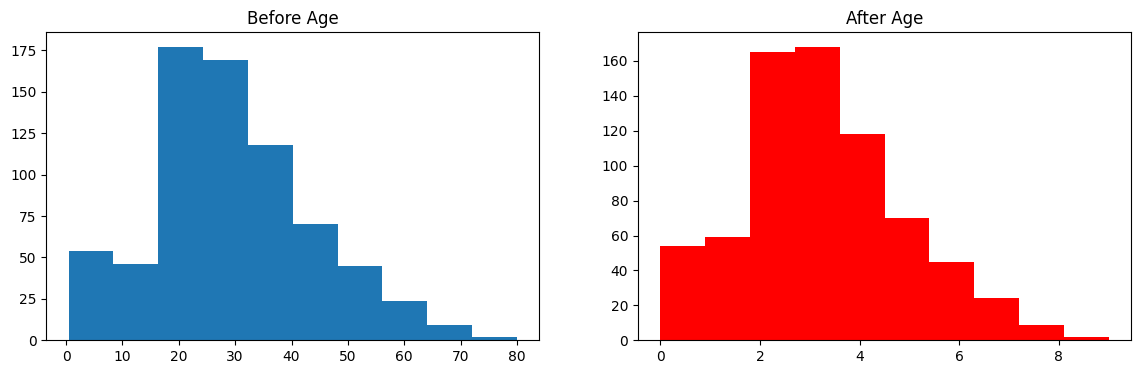

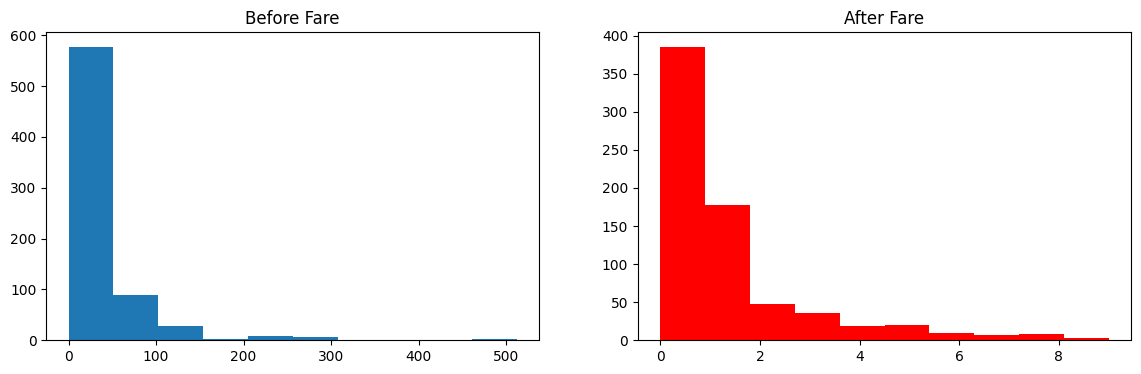

In [37]:
discretize(10,'kmeans')